In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv('Housing (2).csv')  # Replace with actual dataset path

# Display first few rows
print(df.head())

# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Missing Values:
 price               0
area                0
bedrooms            0
bathrooms      

In [3]:
# Convert categorical variables into numeric
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
encoder = LabelEncoder()
for col in categorical_features:
    df[col] = encoder.fit_transform(df[col].astype(str))

# Handling missing values by filling with median
numeric_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in numeric_features:
    df[col] = df[col].fillna(df[col].median())

In [4]:
# Checking correlation
corr_matrix = df.corr()
print("\nCorrelation Matrix:\n", corr_matrix)




Correlation Matrix:
                      price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefar

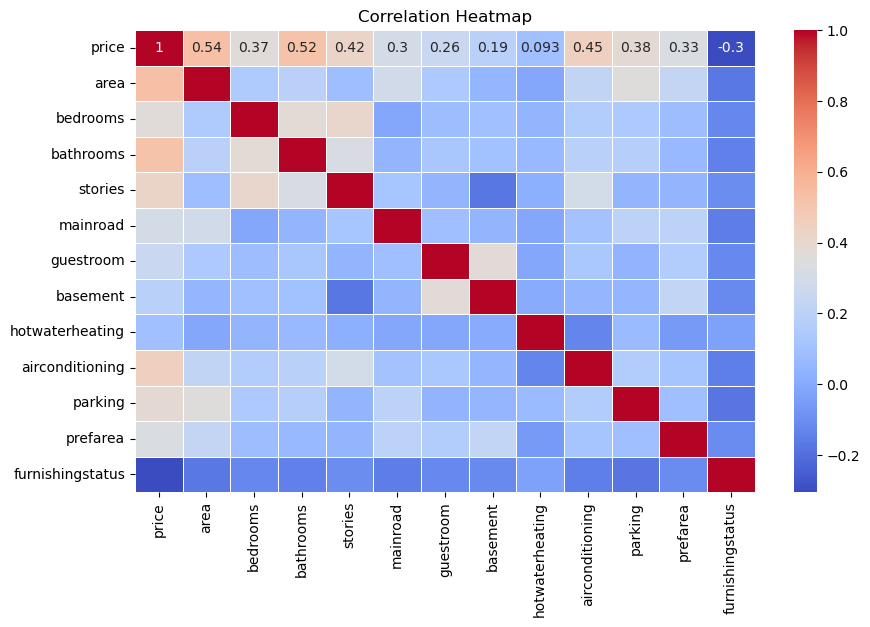

In [5]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

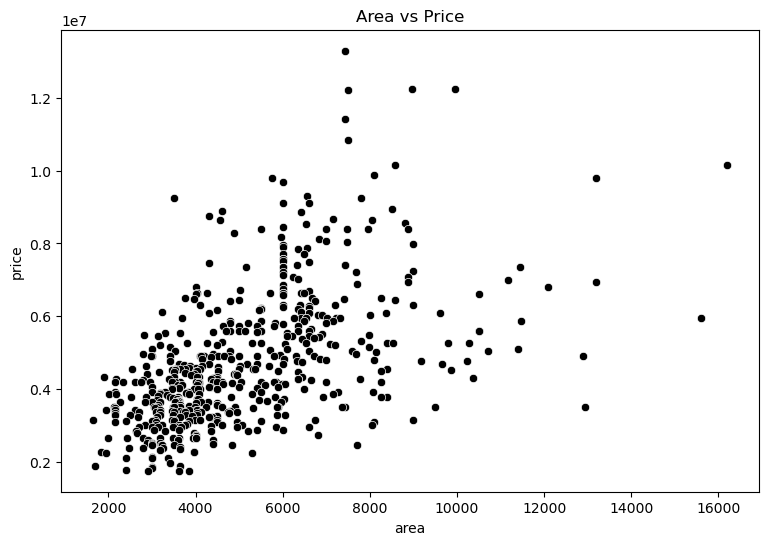

In [6]:

# Scatter plot of area vs price
plt.figure(figsize=(9,6))
sns.scatterplot(x=df['area'], y=df['price'], color='black')
plt.title("Area vs Price")
plt.show()

In [7]:

# Train-Test Split
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Linear Regression Model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

# Model evaluation
print("R-squared Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared Score: 0.6437296086614109
RMSE: 1341936.555772653


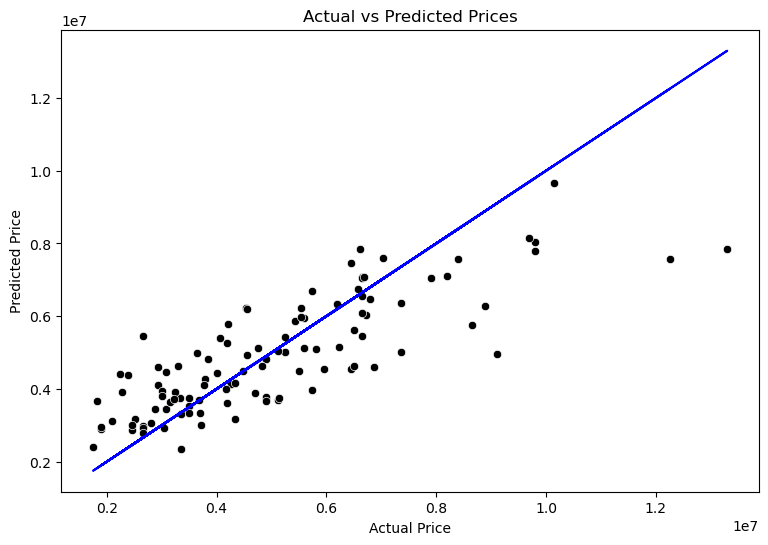

In [9]:
# Scatter plot with regression line
plt.figure(figsize=(9,6))
sns.scatterplot(x=y_test, y=y_pred, color='black')
plt.plot(y_test, y_test, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

C:\Users\SANCHIT\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


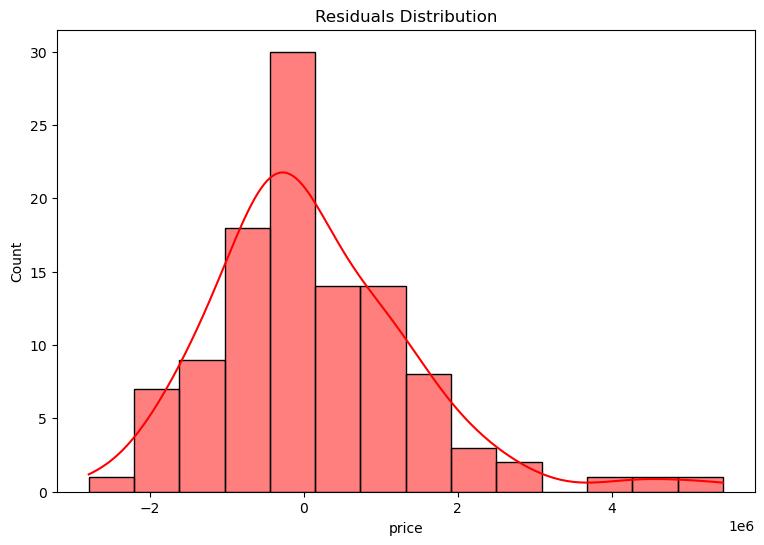

In [10]:

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(9,6))
sns.histplot(residuals, kde=True, color='red')
plt.title("Residuals Distribution")
plt.show()

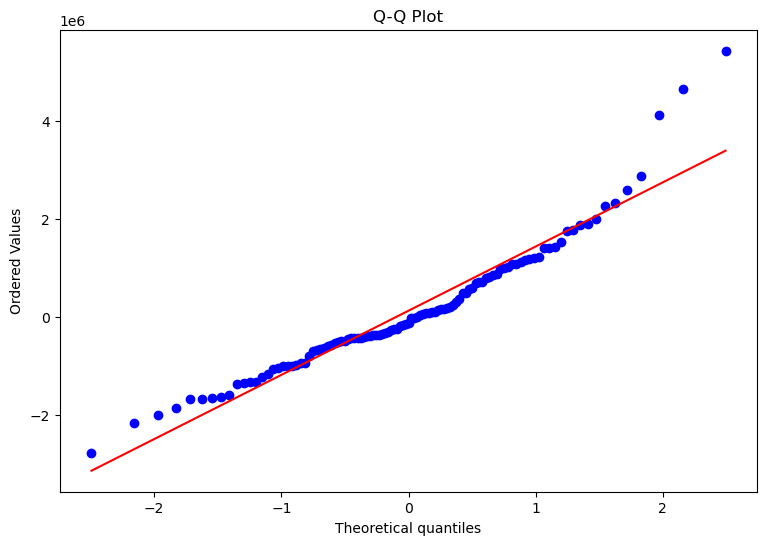

RMSE: 1341936.555772653


In [11]:
# Q-Q Plot
plt.figure(figsize=(9,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

def rmse(predicted, targets):
    return np.sqrt(mean_squared_error(targets, predicted))

print("RMSE:", rmse(y_pred, y_test))